<a href="https://colab.research.google.com/github/MicDso/-Machine-Learning-with-Python-Certification-Projects/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-03-27 14:00:37--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-03-27 14:00:37 (56.4 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset[['sex', 'smoker', 'region']] = dataset[['sex', 'smoker', 'region']].astype('category').apply(lambda x: x.cat.codes)
test_dataset = dataset.sample(frac=0.2)
train_dataset= dataset.drop(test_dataset.index)
train_labels, test_labels = train_dataset.pop('expenses'), test_dataset.pop('expenses')
normalizer = layers.Normalization()
normalizer.adapt(train_dataset.values)
def compile_model(norm):
    model = keras.Sequential([norm,layers.Dense(32, activation = 'relu'),layers.Dense(64, activation = 'relu'),layers.Dense(1, activation = 'relu')])
    model.compile(loss='mean_absolute_error',optimizer=tf.optimizers.Adam(learning_rate=0.2), metrics=['mae', 'mse'])
    return model
model = compile_model(normalizer)
history = model.fit(train_dataset,train_labels,verbose=0,epochs=50, validation_data=(test_dataset,test_labels))

9/9 - 0s - loss: 1563.0470 - mae: 1563.0470 - mse: 16668332.0000 - 52ms/epoch - 6ms/step
Testing set Mean Abs Error: 1563.05 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 4ms/step


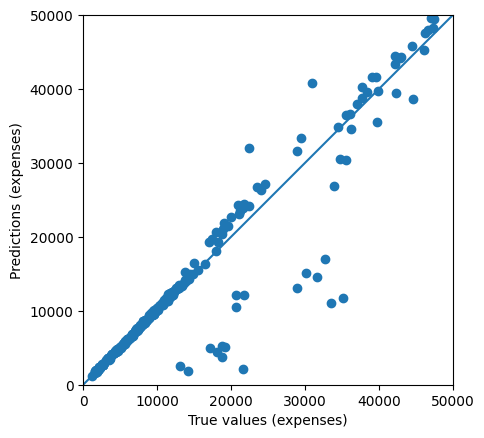

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
